In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [5]:
seeds = [x for x in range(10)]
ks = [3, 4]
classifier_names = ['rf', 'xgb', 'cb']
negative_types = ['auto', 'random']

results = pd.DataFrame(columns=['seed', 'k', 'classifier', 'negative_type', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'TP', 'TN', 'FP', 'FN'])

for k in ks:
    for classifier_name in classifier_names:
        for negative_type in negative_types:
            for seed in seeds:
                with open(f'./results/k{k}/results{seed}_{classifier_name}_{negative_type}.json', 'r') as f:
                    result = json.load(f)
                    results = pd.concat([results, pd.DataFrame({
                        'seed': [seed],
                        'k': [k],
                        'classifier': [classifier_name],
                        'negative_type': [negative_type],
                        'accuracy': [result['accuracy']],
                        'precision': [result['precision']],
                        'recall': [result['recall']],
                        'f1': [result['f1']],
                        'roc_auc': [result['roc_auc']],
                        'TP': [result['TP']],
                        'TN': [result['TN']],
                        'FP': [result['FP']],
                        'FN': [result['FN']]
                    })], ignore_index=True)

results.to_csv('./results/results.csv', index=False)

In [6]:
results.head()

,seed,k,classifier,negative_type,accuracy,precision,recall,f1,roc_auc,TP,TN,FP,FN
0,0,3,rf,auto,0.55375,0.536013,0.8000,0.641926,0.55375,320,123,277,80
1,1,3,rf,auto,0.55000,0.532895,0.8100,0.642857,0.55000,324,116,284,76
2,2,3,rf,auto,0.52750,0.516566,0.8575,0.644737,0.52750,343,79,321,57
3,3,3,rf,auto,0.55750,0.537829,0.8175,0.648810,0.55750,327,119,281,73
4,4,3,rf,auto,0.56125,0.541039,0.8075,0.647944,0.56125,323,126,274,77


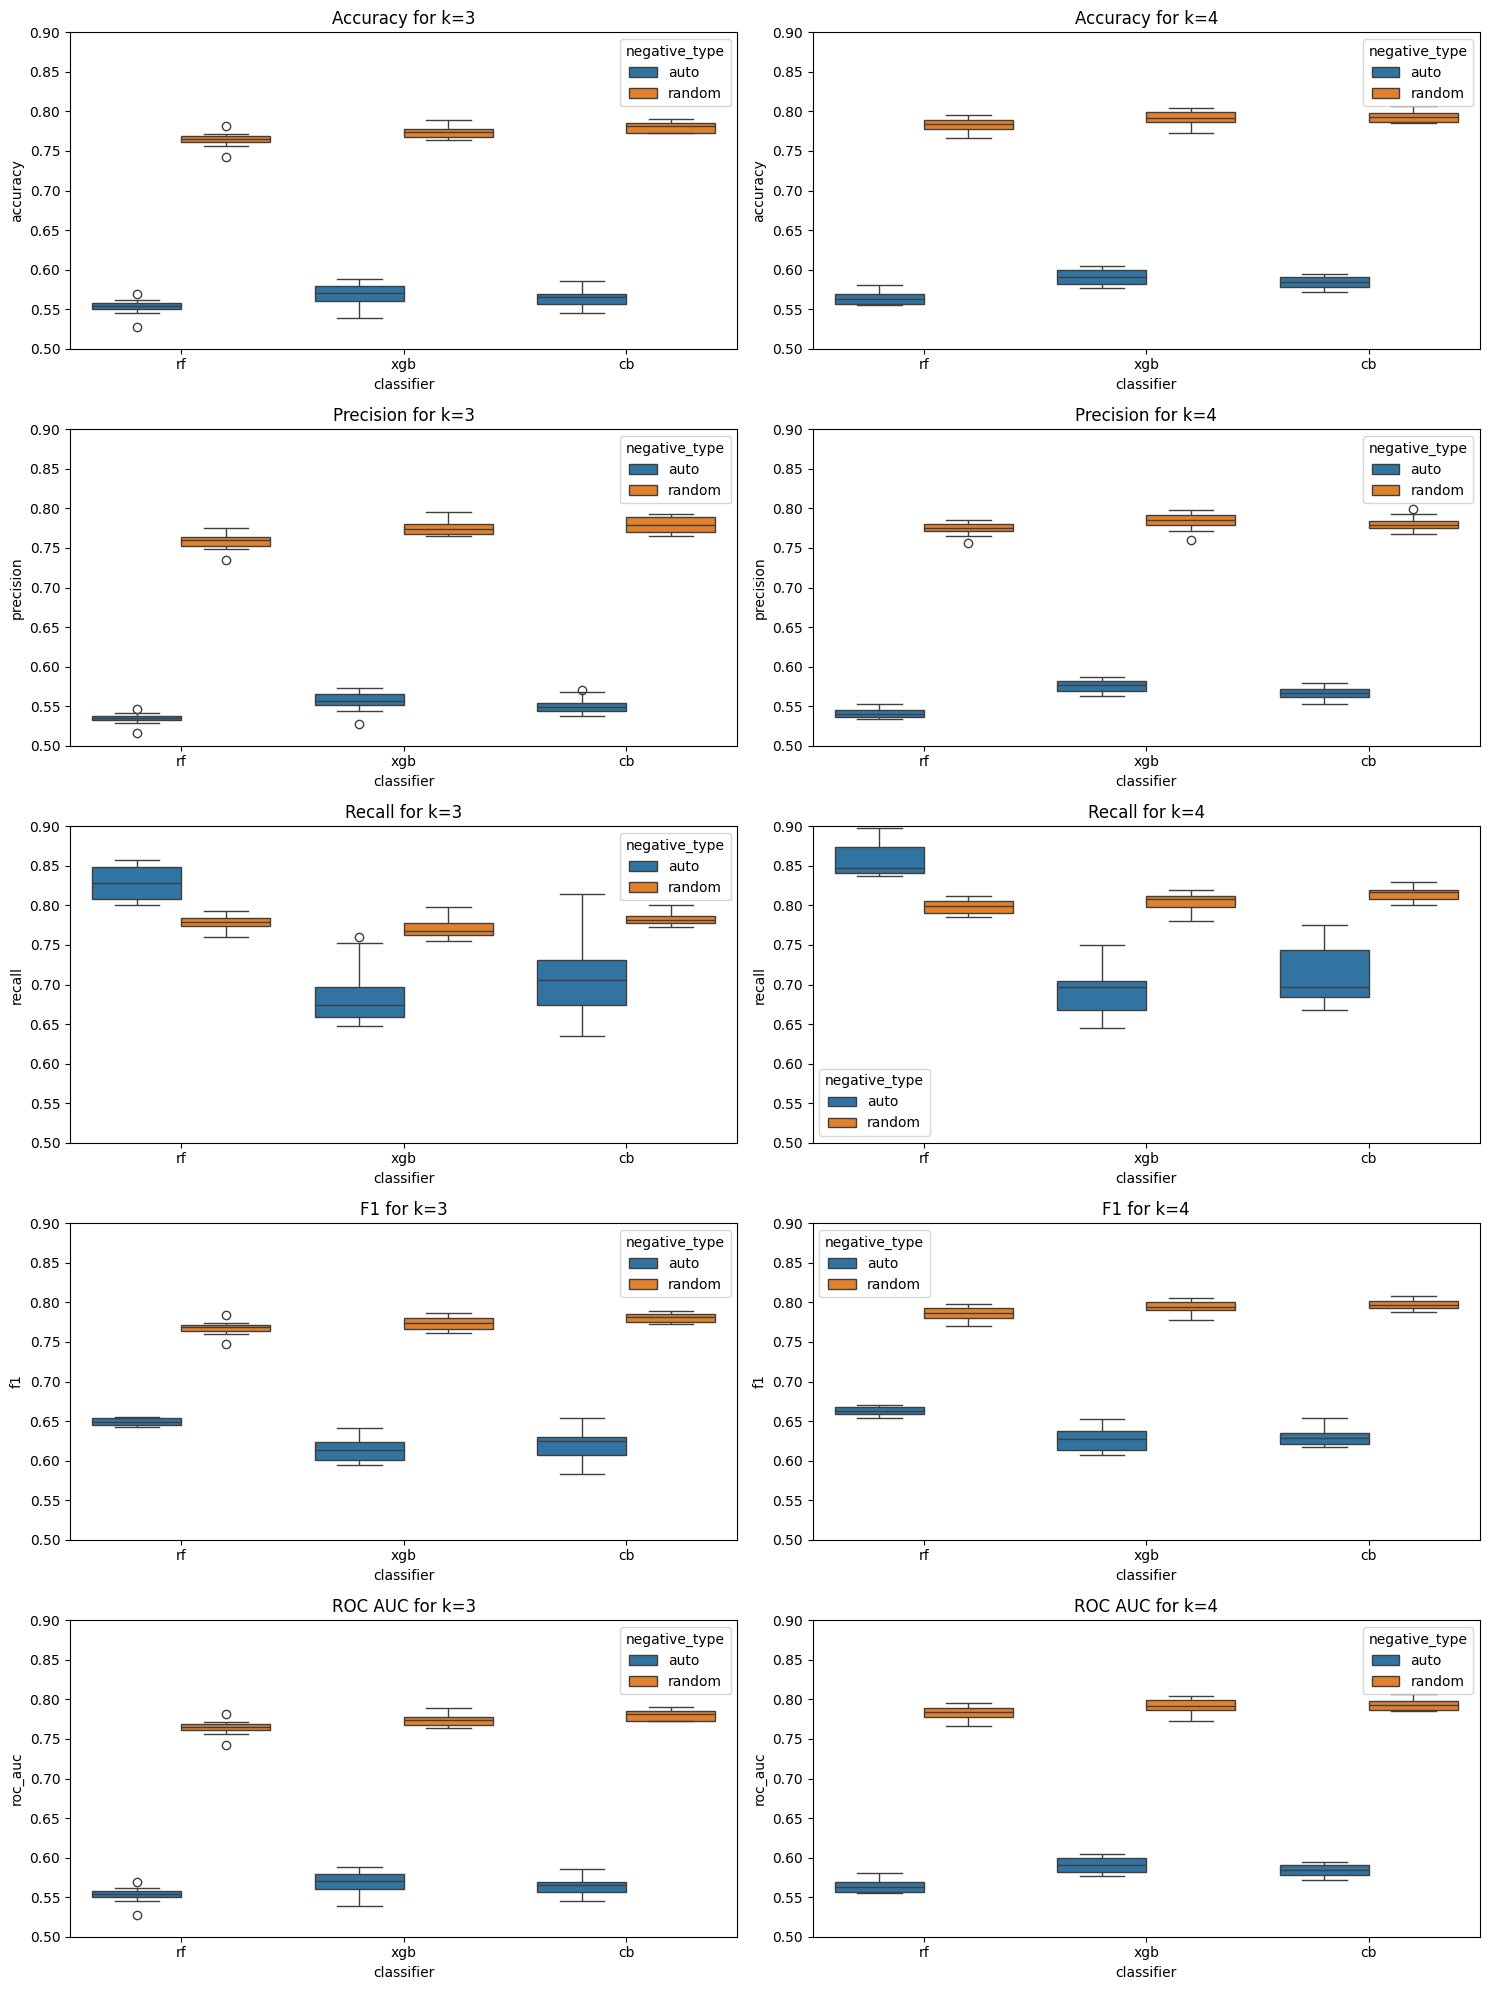

In [ ]:
# subplots of 2 columns and 5 rows
fig, axs = plt.subplots(5, 2, figsize=(15, 20))

# First row: accuracy, left column for k=3 and right column for k=4, boxplot
sns.boxplot(x='classifier', y='accuracy', hue='negative_type', data=results[results['k'] == 3], ax=axs[0, 0])
axs[0, 0].set_title('Accuracy for k=3')
axs[0, 0].set_ylim(0.5, 0.9)
sns.boxplot(x='classifier', y='accuracy', hue='negative_type', data=results[results['k'] == 4], ax=axs[0, 1])
axs[0, 1].set_title('Accuracy for k=4')
axs[0, 1].set_ylim(0.5, 0.9)

# Second row: precision, left column for k=3 and right column for k=4
sns.boxplot(x='classifier', y='precision', hue='negative_type', data=results[results['k'] == 3], ax=axs[1, 0])
axs[1, 0].set_title('Precision for k=3')
axs[1, 0].set_ylim(0.5, 0.9)
sns.boxplot(x='classifier', y='precision', hue='negative_type', data=results[results['k'] == 4], ax=axs[1, 1])
axs[1, 1].set_title('Precision for k=4')
axs[1, 1].set_ylim(0.5, 0.9)

# Third row: recall, left column for k=3 and right column for k=4
sns.boxplot(x='classifier', y='recall', hue='negative_type', data=results[results['k'] == 3], ax=axs[2, 0])
axs[2, 0].set_title('Recall for k=3')
axs[2, 0].set_ylim(0.5, 0.9)
sns.boxplot(x='classifier', y='recall', hue='negative_type', data=results[results['k'] == 4], ax=axs[2, 1])
axs[2, 1].set_title('Recall for k=4')
axs[2, 1].set_ylim(0.5, 0.9)

# Fourth row: f1, left column for k=3 and right column for k=4
sns.boxplot(x='classifier', y='f1', hue='negative_type', data=results[results['k'] == 3], ax=axs[3, 0])
axs[3, 0].set_title('F1 for k=3')
axs[3, 0].set_ylim(0.5, 0.9)
sns.boxplot(x='classifier', y='f1', hue='negative_type', data=results[results['k'] == 4], ax=axs[3, 1])
axs[3, 1].set_title('F1 for k=4')
axs[3, 1].set_ylim(0.5, 0.9)

# Fifth row: roc_auc, left column for k=3 and right column for k=4
sns.boxplot(x='classifier', y='roc_auc', hue='negative_type', data=results[results['k'] == 3], ax=axs[4, 0])
axs[4, 0].set_title('ROC AUC for k=3')
axs[4, 0].set_ylim(0.5, 0.9)
sns.boxplot(x='classifier', y='roc_auc', hue='negative_type', data=results[results['k'] == 4], ax=axs[4, 1])
axs[4, 1].set_title('ROC AUC for k=4')
axs[4, 1].set_ylim(0.5, 0.9)

plt.tight_layout()
plt.savefig('./results/results.png')
plt.show()

In [17]:
# Find the best result for each metric and return its seed, k, classifier, and negative_type
best_accuracy = results.loc[results['accuracy'].idxmax()]
best_precision = results.loc[results['precision'].idxmax()]
best_recall = results.loc[results['recall'].idxmax()]
best_f1 = results.loc[results['f1'].idxmax()]
best_roc_auc = results.loc[results['roc_auc'].idxmax()]

best_results = pd.DataFrame({
    'metric': ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    'seed': [best_accuracy['seed'], best_precision['seed'], best_recall['seed'], best_f1['seed'], best_roc_auc['seed']],
    'k': [best_accuracy['k'], best_precision['k'], best_recall['k'], best_f1['k'], best_roc_auc['k']],
    'classifier': [best_accuracy['classifier'], best_precision['classifier'], best_recall['classifier'], best_f1['classifier'], best_roc_auc['classifier']],
    'negative_type': [best_accuracy['negative_type'], best_precision['negative_type'], best_recall['negative_type'], best_f1['negative_type'], best_roc_auc['negative_type']],
    'accuracy': [best_accuracy['accuracy'], best_precision['accuracy'], best_recall['accuracy'], best_f1['accuracy'], best_roc_auc['accuracy']],
    'precision': [best_accuracy['precision'], best_precision['precision'], best_recall['precision'], best_f1['precision'], best_roc_auc['precision']],
    'recall': [best_accuracy['recall'], best_precision['recall'], best_recall['recall'], best_f1['recall'], best_roc_auc['recall']],
    'f1': [best_accuracy['f1'], best_precision['f1'], best_recall['f1'], best_f1['f1'], best_roc_auc['f1']],
    'roc_auc': [best_accuracy['roc_auc'], best_precision['roc_auc'], best_recall['roc_auc'], best_f1['roc_auc'], best_roc_auc['roc_auc']]
})
best_results.to_csv('./results/best_results.csv', index=False)
best_results

,metric,seed,k,classifier,negative_type,accuracy,precision,recall,f1,roc_auc
0,accuracy,7,4,cb,random,0.80625,0.799511,0.8175,0.808405,0.80625
1,precision,7,4,cb,random,0.80625,0.799511,0.8175,0.808405,0.80625
2,recall,2,4,rf,auto,0.55625,0.533432,0.8975,0.669152,0.55625
3,f1,7,4,cb,random,0.80625,0.799511,0.8175,0.808405,0.80625
4,roc_auc,7,4,cb,random,0.80625,0.799511,0.8175,0.808405,0.80625


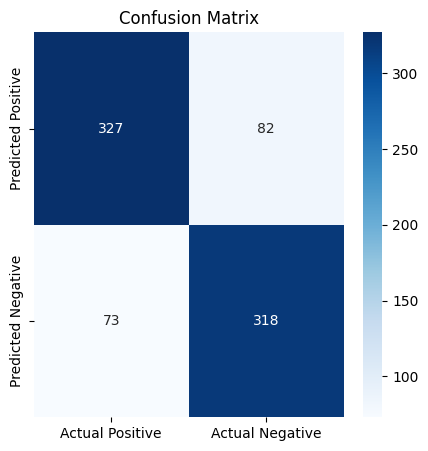

In [18]:
# Confusion matrix for seed=7, k=4m classifier=cb, negative_type=random
with open('./results/k4/results7_cb_random.json', 'r') as f:
    result = json.load(f)
    TP = result['TP']
    TN = result['TN']
    FP = result['FP']
    FN = result['FN']

confusion_matrix = pd.DataFrame({
    'Actual Positive': [TP, FN],
    'Actual Negative': [FP, TN]
}, index=['Predicted Positive', 'Predicted Negative'])

# Heatmap of confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('./results/confusion_matrix_best_model.png')
plt.show()

In [19]:
seeds = [0]
ks = [5]
classifier_names = ['rf', 'xgb', 'cb']
negative_types = ['auto', 'random']

results = pd.DataFrame(columns=['seed', 'k', 'classifier', 'negative_type', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'TP', 'TN', 'FP', 'FN'])

for k in ks:
    for classifier_name in classifier_names:
        for negative_type in negative_types:
            for seed in seeds:
                with open(f'./results/k{k}/results{seed}_{classifier_name}_{negative_type}.json', 'r') as f:
                    result = json.load(f)
                    results = pd.concat([results, pd.DataFrame({
                        'seed': [seed],
                        'k': [k],
                        'classifier': [classifier_name],
                        'negative_type': [negative_type],
                        'accuracy': [result['accuracy']],
                        'precision': [result['precision']],
                        'recall': [result['recall']],
                        'f1': [result['f1']],
                        'roc_auc': [result['roc_auc']],
                        'TP': [result['TP']],
                        'TN': [result['TN']],
                        'FP': [result['FP']],
                        'FN': [result['FN']]
                    })], ignore_index=True)

results.to_csv('./results/results_k5.csv', index=False)

In [20]:
# Find the best result for each metric and return its seed, k, classifier, and negative_type
best_accuracy = results.loc[results['accuracy'].idxmax()]
best_precision = results.loc[results['precision'].idxmax()]
best_recall = results.loc[results['recall'].idxmax()]
best_f1 = results.loc[results['f1'].idxmax()]
best_roc_auc = results.loc[results['roc_auc'].idxmax()]

best_results = pd.DataFrame({
    'metric': ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    'seed': [best_accuracy['seed'], best_precision['seed'], best_recall['seed'], best_f1['seed'], best_roc_auc['seed']],
    'k': [best_accuracy['k'], best_precision['k'], best_recall['k'], best_f1['k'], best_roc_auc['k']],
    'classifier': [best_accuracy['classifier'], best_precision['classifier'], best_recall['classifier'], best_f1['classifier'], best_roc_auc['classifier']],
    'negative_type': [best_accuracy['negative_type'], best_precision['negative_type'], best_recall['negative_type'], best_f1['negative_type'], best_roc_auc['negative_type']],
    'accuracy': [best_accuracy['accuracy'], best_precision['accuracy'], best_recall['accuracy'], best_f1['accuracy'], best_roc_auc['accuracy']],
    'precision': [best_accuracy['precision'], best_precision['precision'], best_recall['precision'], best_f1['precision'], best_roc_auc['precision']],
    'recall': [best_accuracy['recall'], best_precision['recall'], best_recall['recall'], best_f1['recall'], best_roc_auc['recall']],
    'f1': [best_accuracy['f1'], best_precision['f1'], best_recall['f1'], best_f1['f1'], best_roc_auc['f1']],
    'roc_auc': [best_accuracy['roc_auc'], best_precision['roc_auc'], best_recall['roc_auc'], best_f1['roc_auc'], best_roc_auc['roc_auc']]
})
best_results.to_csv('./results/best_results_k5.csv', index=False)
best_results

,metric,seed,k,classifier,negative_type,accuracy,precision,recall,f1,roc_auc
0,accuracy,0,5,cb,random,0.780,0.764151,0.8100,0.786408,0.780
1,precision,0,5,cb,random,0.780,0.764151,0.8100,0.786408,0.780
2,recall,0,5,rf,auto,0.575,0.545872,0.8925,0.677419,0.575
3,f1,0,5,cb,random,0.780,0.764151,0.8100,0.786408,0.780
4,roc_auc,0,5,cb,random,0.780,0.764151,0.8100,0.786408,0.780
